### Importing the libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

### Review data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [6]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0
399,15594041,Female,49.0,36000.0,1


### Split data into the independent vs dependent variables

In [7]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

### Split data into train and test sets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 0)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc_X = StandardScaler()

In [12]:
X_train = sc_X.fit_transform(X_train)

In [13]:
X_test = sc_X.fit_transform(X_test)

### Fitting Kernel-SVM Model to the Tranining set

In [14]:
from sklearn.svm import SVC

In [15]:
classifier = SVC(kernel = 'rbf',random_state=0)

In [16]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

### Predicting the Test set results

In [17]:
y_pred = classifier.predict(X_test)

### Making the confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test,y_pred)

In [20]:
cm

array([[64,  4],
       [ 3, 29]])

### Applying k-Fold Cross Validation


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 )
#cv: number of folds we want to create

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

Note: If we work on the large dataset, we need to set the <code>n_jobs</code> that is for running all the CPUs


In [23]:
accuracies.mean()

0.9005302187615868

In [24]:
accuracies.std()

0.06388957356626285

Standard deviation is 6% that means that when we evaluate our performance in most of the time, we get the accuracy between 90-6 and 90+6. This is low bias and low variance. 

### Applying Grid Search to find the best model and the best paramaters


In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel' :['linear']},\
              {'C' : [1, 10, 100, 1000], 'kernel':['rbf'],\
               'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

Note:
 - Paramater $C (=\dfrac{1}{\lambda})$ in SVC: the more we increase $C$, the more it will prenvent overfitting but don't increase too much because it could make another problem (underfitting)
 - Large C gives a hypothesis of low bias high variance --> overfitting
 - Small C gives a hypothesis of high bias low variance --> underfitting
 - The <code>gamma</code> (= $\dfrac{1}{\sigma^2}$) parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The <code>gamma</code> parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.     
  

In [27]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1 # for the large dataset
                           )

In [28]:
grid_search = grid_search.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
best_accuracy = grid_search.best_score_
best_accuracy

0.9033333333333333

In [41]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}

### Visualising the  Training set results

In [29]:
from matplotlib.colors import ListedColormap

In [30]:
X_set, y_set = X_train, y_train

In [31]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.5825424477554764, 3.3274575522443977)

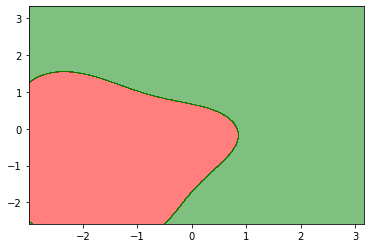

In [32]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

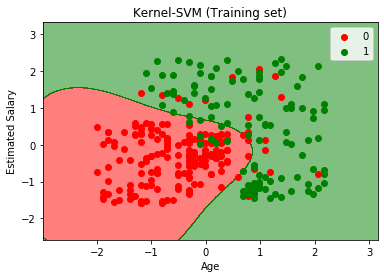

In [33]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                color = ListedColormap(('red','green'))(i),label =j  )
plt.title('Kernel-SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

In [34]:
from matplotlib.colors import ListedColormap

In [35]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.6884311278377804, 3.431568872162089)

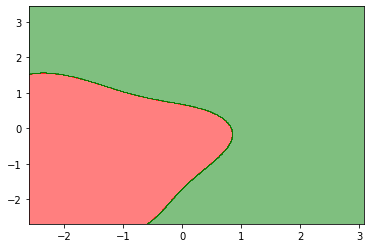

In [36]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

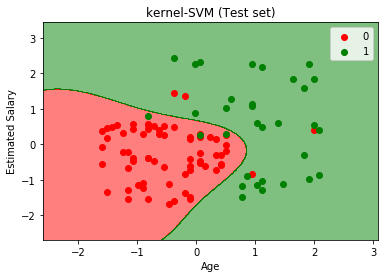

In [37]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                color = ListedColormap(('red','green'))(i),label =j  )
plt.title('kernel-SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()